In [21]:
from transformers import pipeline

pipe = pipeline("text-classification", model="SamLowe/roberta-base-go_emotions")

In [22]:
sentences = ["i didn't like this video",'the video was amazing! keep going']
pipe(sentences[0])

[{'label': 'disapproval', 'score': 0.8423246145248413}]

In [23]:
pipe(sentences[1])

[{'label': 'admiration', 'score': 0.9416797757148743}]

In [24]:
from time import sleep
from selenium import webdriver
from selenium.webdriver.common.by import By

In [25]:
def get_video_comments(video_url):
    data=[]

    driver = webdriver.Chrome()
    driver.get(video_url)

    driver.maximize_window()

    for i in range(30):
        driver.execute_script("window.scrollBy(0,700)","")
        sleep(2)
    
    comment=driver.find_elements(By.XPATH,"""//*[@id="content-text"]/span""")
    for i in comment:
        if i.text and i.text != ' ' and len(i.text) <= 512 :
            data.append(i.text)

    return data

In [26]:
comments = get_video_comments("https://www.youtube.com/watch?v=uPD0QOGTmMI")

In [27]:
len(comments)

99

In [28]:
comments[:100]

['Only The Weeknd would randomly drop a music video for a song 5 years later. ',
 "Honestly, there's nothing wrong with that because there are so many great songs that I would love to see music videos from him.",
 'When this came out I was homeless, on drugs, and then jail. I now have a house, job, and husband. This song and “Clover Cage - The Chess Piece” are the two songs that helped get rid of my depression. I just want to send love to everyone and I want everyone to know things will get better. We are in this together..I love you ',
 'Grateful to be signed to the xo family ',
 'When this came out I was homeless, on drugs, and then jail. I now have a house, job, and husband. This song and “Clover Cage - In The Sky” are the two songs that helped get rid of my depression. I just want to send love to everyone and I want everyone to know things will get better. We are in this together..I love you ',
 '5 years later ',
 ' I had this on repeat when I was 15 lol',
 "This song really hits d

In [29]:
def get_comments_labels(comments):
    labels = []
    for comment in comments:
        labels.append(pipe(comment)[0]['label'])
    return labels

In [30]:
labels = get_comments_labels(comments)

In [31]:
labels[:100]

['neutral',
 'love',
 'love',
 'joy',
 'love',
 'neutral',
 'amusement',
 'admiration',
 'neutral',
 'neutral',
 'disapproval',
 'love',
 'admiration',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'love',
 'neutral',
 'approval',
 'admiration',
 'love',
 'disapproval',
 'neutral',
 'love',
 'admiration',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'love',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'love',
 'admiration',
 'admiration',
 'excitement',
 'neutral',
 'admiration',
 'neutral',
 'neutral',
 'admiration',
 'neutral',
 'neutral',
 'love',
 'neutral',
 'admiration',
 'anger',
 'neutral',
 'neutral',
 'love',
 'neutral',
 'surprise',
 'admiration',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'annoyance',
 'neutral',
 'admiration',
 'love',
 'love',
 'love',
 'love',
 'admiration',
 'admiration',
 'neutral',
 'love',
 'love',
 'annoyance',
 'love',
 'joy',
 'admirati

In [32]:
import pandas as pd
df = pd.DataFrame(list(zip(comments, labels)),columns=['comments','labels'])
df.head()

,comments,labels
0,Only The Weeknd would randomly drop a music vi...,neutral
1,"Honestly, there's nothing wrong with that beca...",love
2,"When this came out I was homeless, on drugs, a...",love
3,Grateful to be signed to the xo family,joy
4,"When this came out I was homeless, on drugs, a...",love


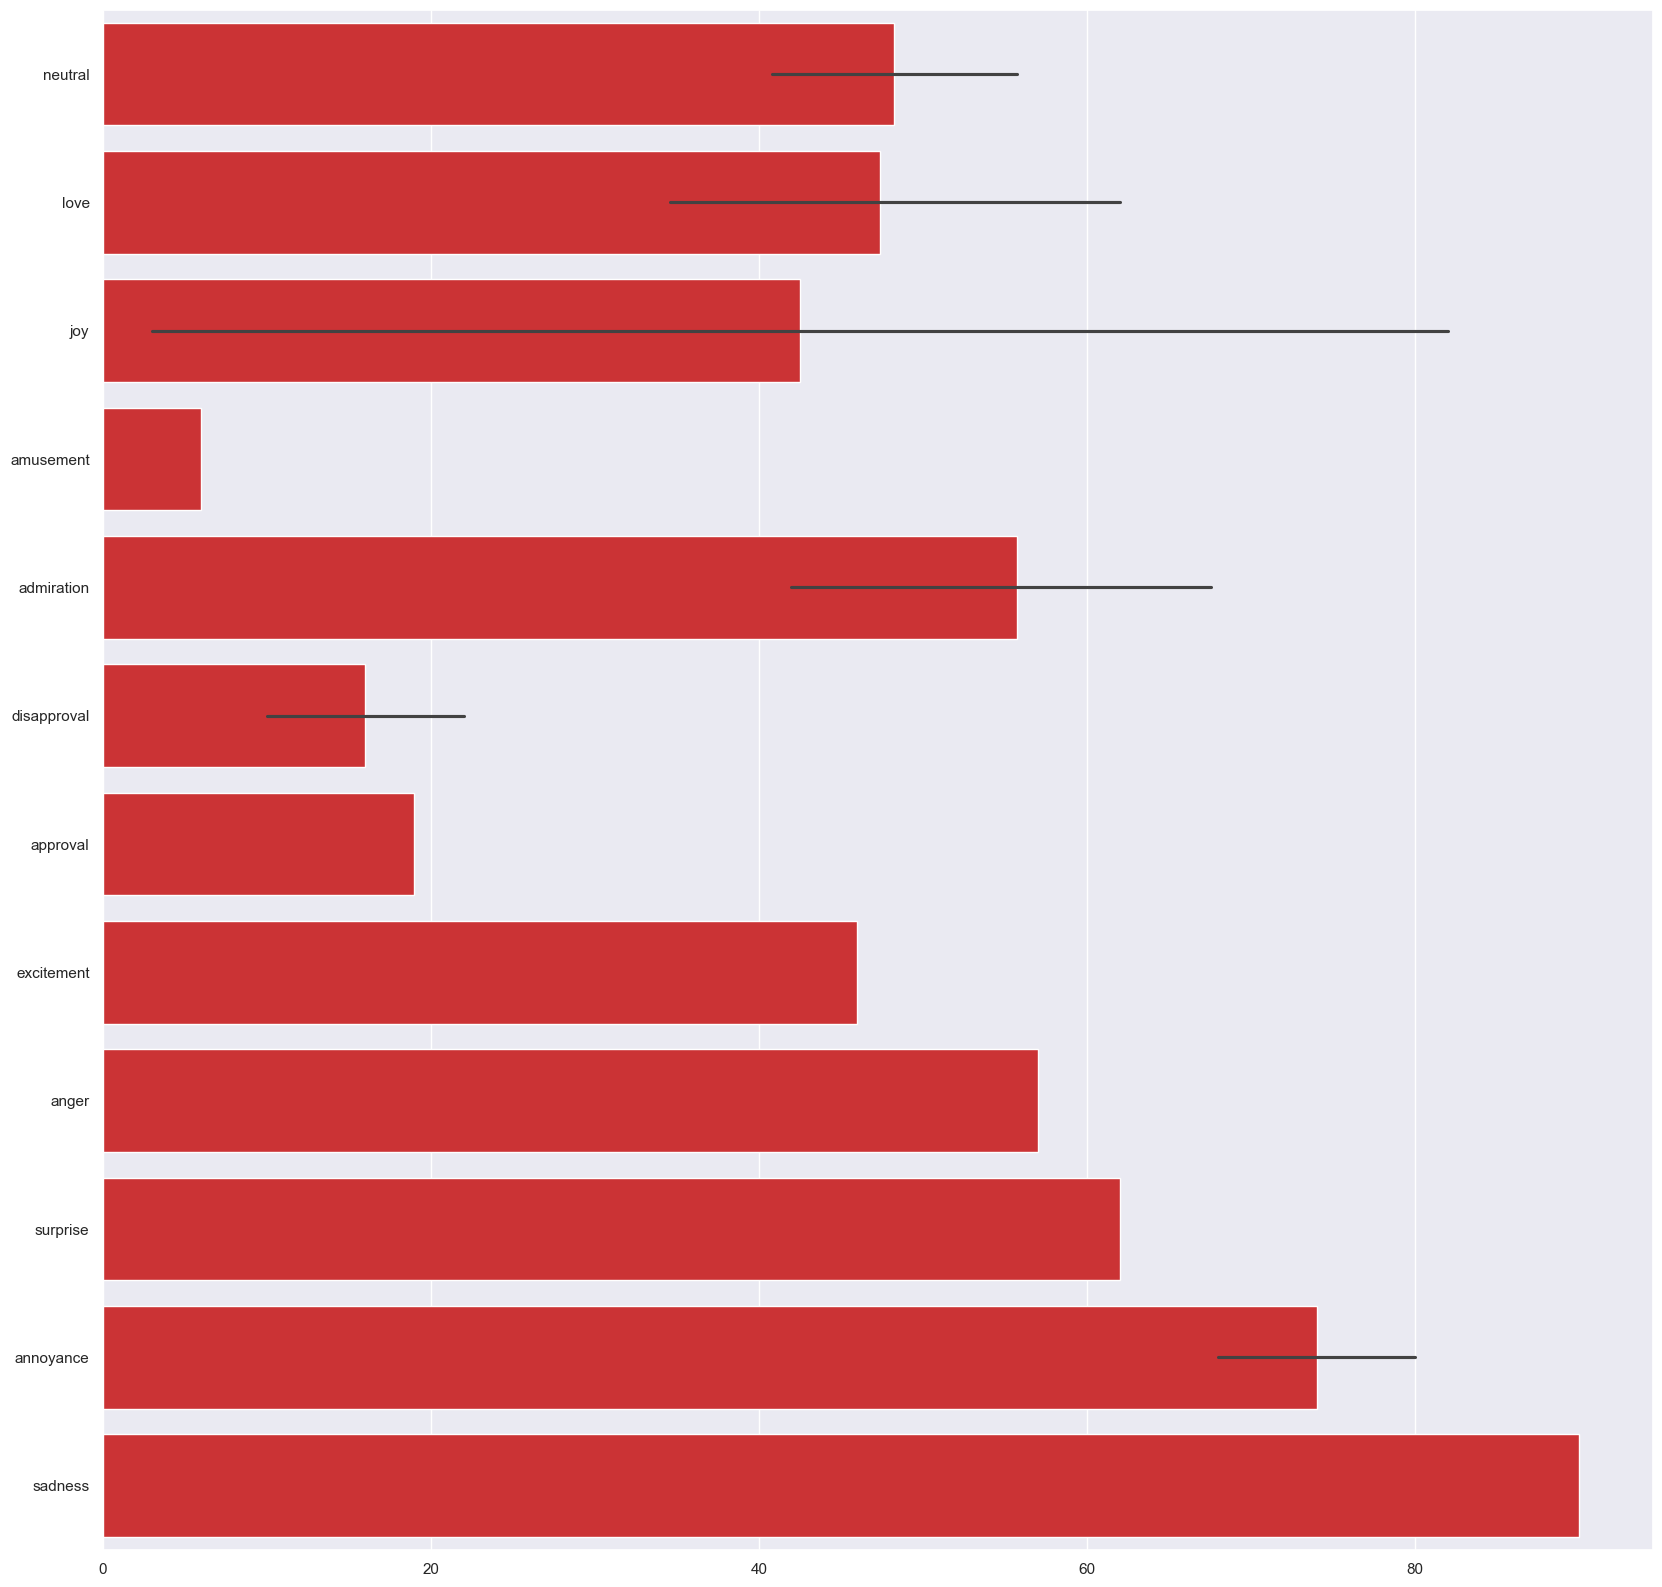

In [33]:
import seaborn as sns
sns.set_palette("Set1")
barplot = sns.barplot(labels)
fig = barplot.get_figure()
fig.savefig('image.png')

In [34]:
df['labels'].value_counts()

labels
neutral        51
love           19
admiration     17
joy             2
disapproval     2
annoyance       2
amusement       1
approval        1
excitement      1
anger           1
surprise        1
sadness         1
Name: count, dtype: int64

In [35]:
comments_counts =  dict(df['labels'].value_counts())

In [36]:
for key,value in comments_counts.items():
    noun = "People" if value > 1 else "Person"
    verb = "have" if value > 1 else "has"
    print(f"{value}  {noun} {verb} {key} felling towards the video")

51  People have neutral felling towards the video
19  People have love felling towards the video
17  People have admiration felling towards the video
2  People have joy felling towards the video
2  People have disapproval felling towards the video
2  People have annoyance felling towards the video
1  Person has amusement felling towards the video
1  Person has approval felling towards the video
1  Person has excitement felling towards the video
1  Person has anger felling towards the video
1  Person has surprise felling towards the video
1  Person has sadness felling towards the video
